In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from random import randint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [4]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,A,4,4,at_home,teacher,yes,no,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,T,1,1,at_home,other,no,yes,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,T,1,1,at_home,other,yes,no,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,T,4,2,health,services,no,yes,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,T,3,3,other,other,no,yes,yes,no,yes,no,4,3,1,2,5,10


In [5]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [6]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,A,4,4,at_home,teacher,yes,no,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,T,1,1,at_home,other,no,yes,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,T,1,1,at_home,other,yes,no,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,T,4,2,health,services,no,yes,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,T,3,3,other,other,no,yes,yes,no,yes,no,4,3,1,2,5,0


<AxesSubplot:xlabel='underperformance', ylabel='count'>

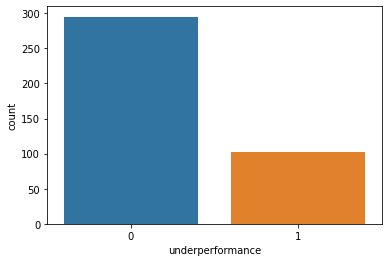

In [7]:
sns.countplot(df['underperformance'])

### The first thing we wanna do is remove any null values.

In [8]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

### We can see that age and Math both have missisng values

In [9]:
df = df.dropna()
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

### Checking/Removing Outliers and creating dummy variables

<AxesSubplot:ylabel='age'>

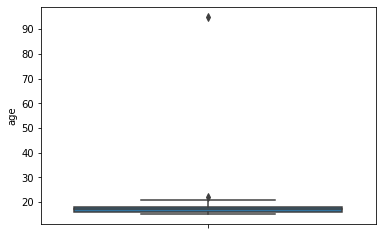

In [10]:
sns.boxplot(y=df['age'])

<AxesSubplot:ylabel='age'>

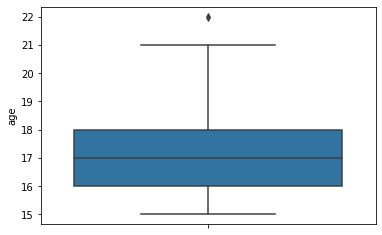

In [11]:
df = df[ df['age'] <= 22]
df = df[ df['age'] >= 15]
sns.boxplot(y=df['age'])

<AxesSubplot:ylabel='traveltime'>

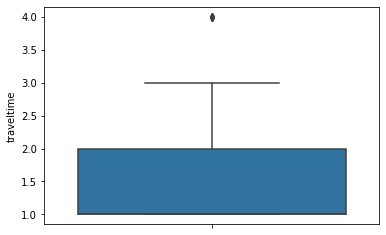

In [12]:
sns.boxplot(y=df['traveltime'])

In [13]:
def traveltime(x):
    if x == 1:
        return randint(0,15)
    elif x == 2:
        return randint(15,30)
    elif x == 3:
        return randint(30,60)
    elif x == 4:
        return 60
    

df['traveltime'] = df['traveltime'].apply(traveltime)

<AxesSubplot:ylabel='traveltime'>

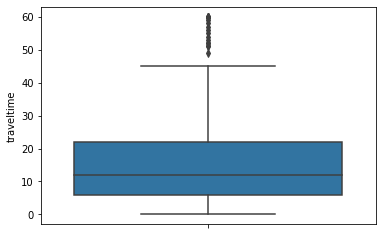

In [14]:
sns.boxplot(y=df['traveltime'])

<AxesSubplot:ylabel='studytime'>

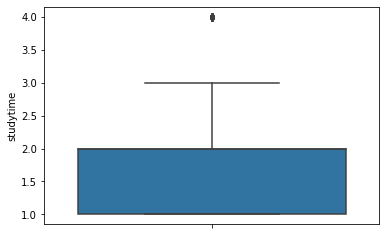

In [15]:
sns.boxplot(y=df['studytime'])

In [16]:
def studytime(x):
    if x == 1:
        return randint(0,2) * 60
    elif x == 2:
        return randint(2,5) * 60
    elif x == 3:
        return randint(5,10) * 60
    elif x == 4:
        return 10 * 60
    

df['studytime'] = df['studytime'].apply(studytime)

<AxesSubplot:ylabel='studytime'>

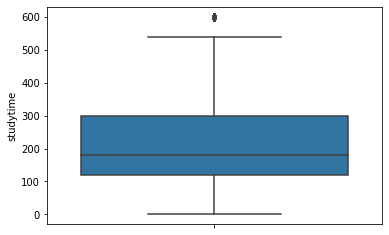

In [17]:
sns.boxplot(y=df['studytime'])

<AxesSubplot:ylabel='failures'>

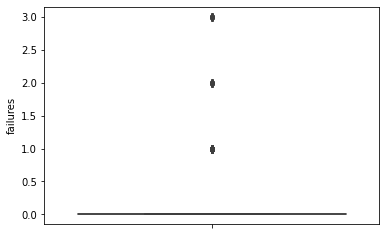

In [18]:
sns.boxplot(y=df['failures'])

In [19]:
def failures(x):
    if (x < 3 and x >= 1):
        return x
    else:
        return 4

df['failures'] = df['failures'].apply(failures)

<AxesSubplot:ylabel='failures'>

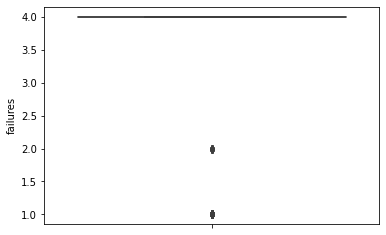

In [20]:
sns.boxplot(y=df['failures'])

<AxesSubplot:ylabel='absences'>

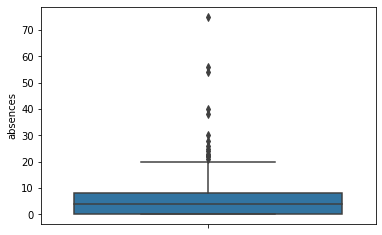

In [21]:
sns.boxplot(y=df['absences'])

<AxesSubplot:ylabel='Math_G1'>

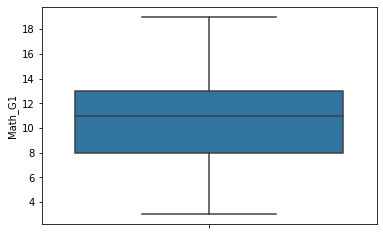

In [22]:
sns.boxplot(y=df['Math_G1'])

<AxesSubplot:ylabel='Language_G1'>

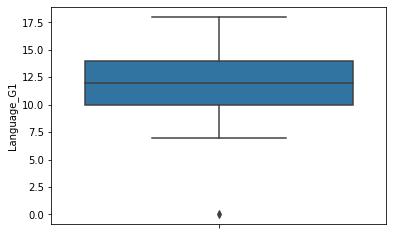

In [23]:
sns.boxplot(y=df['Language_G1'])

<AxesSubplot:ylabel='Medu'>

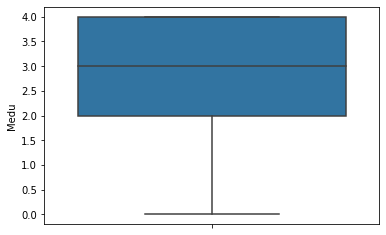

In [24]:
sns.boxplot(y=df['Medu'])

<AxesSubplot:ylabel='Fedu'>

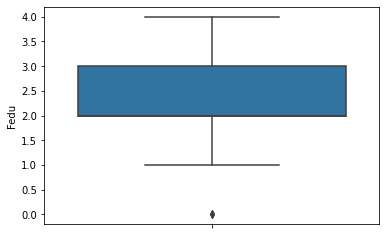

In [25]:
sns.boxplot(y=df['Fedu'])

<AxesSubplot:ylabel='health'>

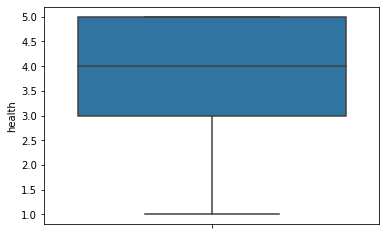

In [26]:
sns.boxplot(y=df['health'])

This part of the cleanup of the data was more about removing the outliers in accordance to the specifications provided in the beginning.

### All the data is now cleaned up. We can now look for correlations amongst our data.

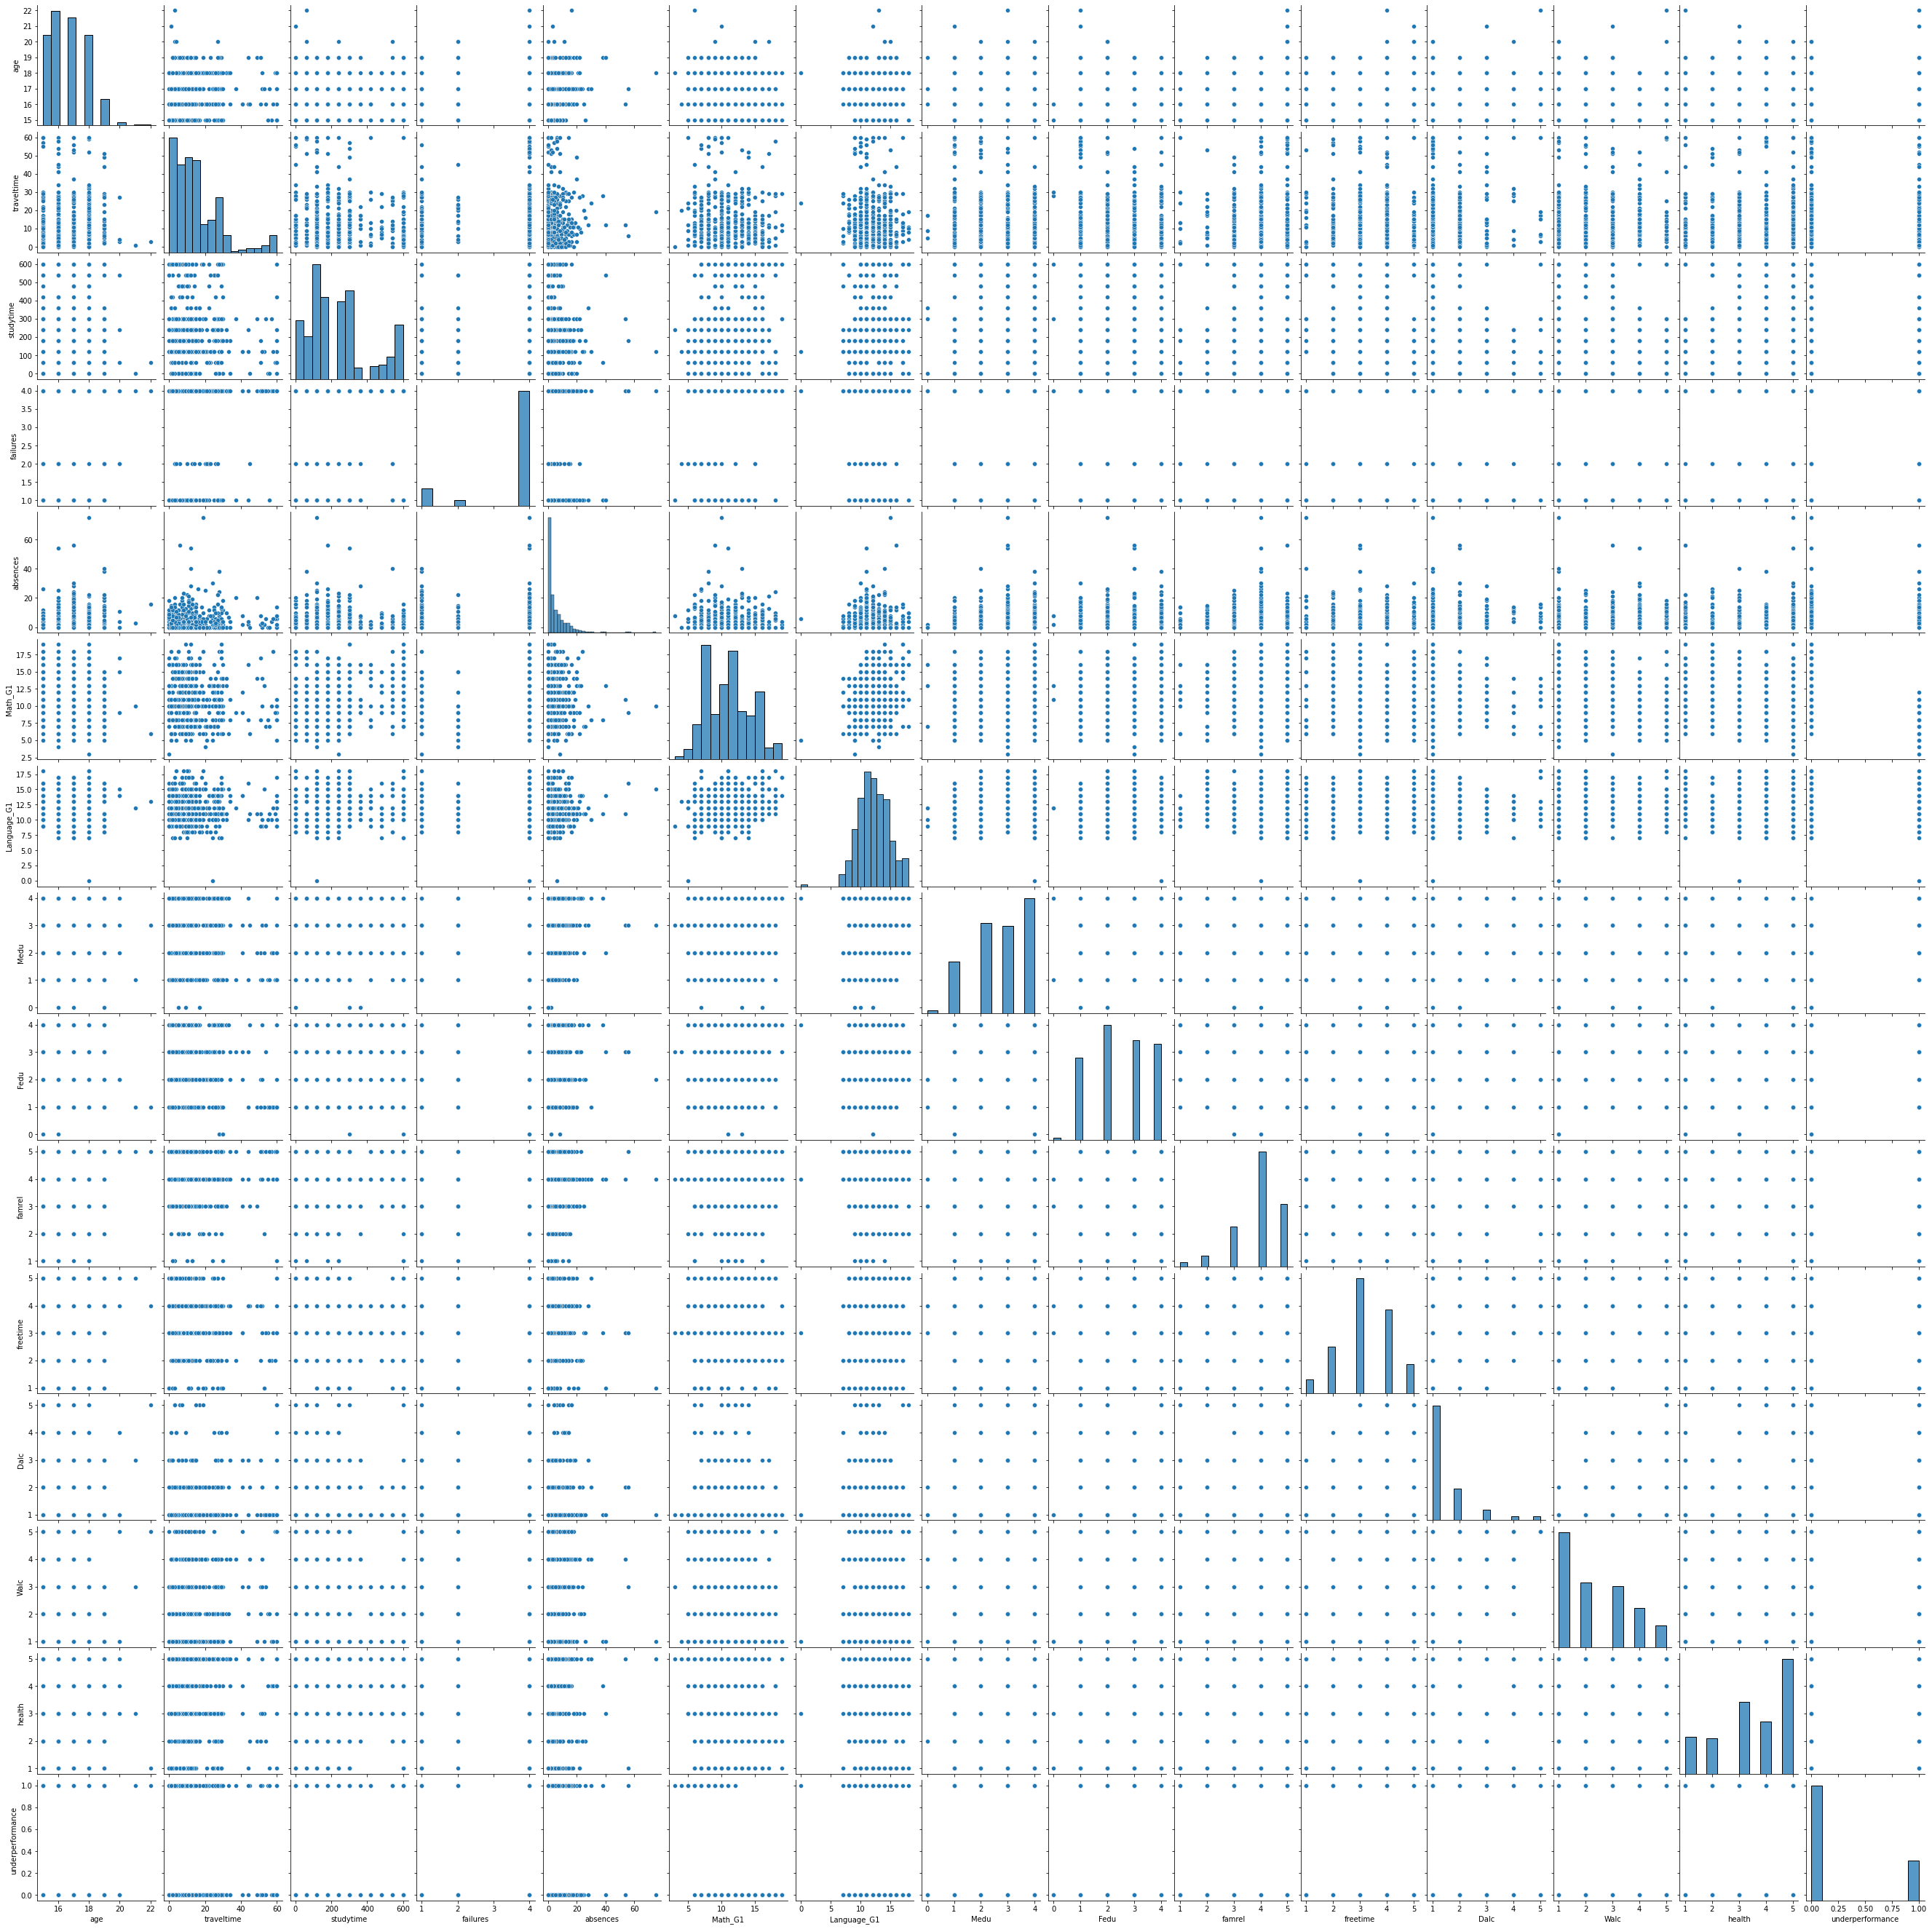

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,1.000000,0.070111,0.002216,-0.250461,0.175230,-0.064081,0.014470,-0.163658,-0.163438,0.053940,0.016434,0.131125,0.117276,-0.062187,0.131571
traveltime,0.070111,1.000000,-0.096440,-0.041130,-0.007678,-0.066992,-0.060421,-0.149739,-0.138276,-0.025364,-0.028231,0.108074,0.142310,-0.048565,0.058492
studytime,0.002216,-0.096440,1.000000,0.090438,-0.075139,0.170283,0.048168,0.069001,0.006366,0.042925,-0.143399,-0.201452,-0.236999,-0.048805,-0.094132
failures,-0.250461,-0.041130,0.090438,1.000000,-0.178804,0.211143,0.005938,0.170172,0.129057,0.053376,-0.023478,-0.107434,-0.081710,-0.088858,-0.245981
absences,0.175230,-0.007678,-0.075139,-0.178804,1.000000,-0.031003,0.036896,0.100285,0.024473,-0.044354,-0.058078,0.111908,0.136291,-0.029937,0.009188
Math_G1,-0.064081,-0.066992,0.170283,0.211143,-0.031003,1.000000,0.314416,0.205341,0.190270,0.022168,0.012613,-0.094159,-0.126179,-0.073172,-0.636391
Language_G1,0.014470,-0.060421,0.048168,0.005938,0.036896,0.314416,1.000000,0.114472,0.071270,0.008317,0.016303,-0.024678,-0.028158,-0.048355,-0.166355
Medu,-0.163658,-0.149739,0.069001,0.170172,0.100285,0.205341,0.114472,1.000000,0.623455,-0.003914,0.030891,0.019834,-0.047123,-0.046878,-0.118698
Fedu,-0.163438,-0.138276,0.006366,0.129057,0.024473,0.190270,0.071270,0.623455,1.000000,-0.001370,-0.012846,0.002386,-0.012631,0.014742,-0.112808
famrel,0.053940,-0.025364,0.042925,0.053376,-0.044354,0.022168,0.008317,-0.003914,-0.001370,1.000000,0.150701,-0.077594,-0.113397,0.094056,-0.034357


In [29]:
df.corr() > .3

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
traveltime,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
studytime,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
failures,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
absences,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Math_G1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Language_G1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Medu,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
Fedu,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
famrel,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


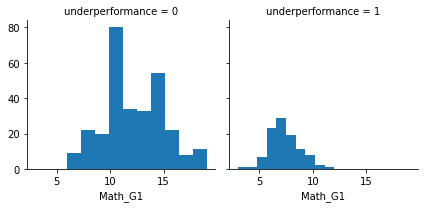

In [30]:
x = sns.FacetGrid(df, col = 'underperformance')
x = x.map(plt.hist, 'Math_G1')

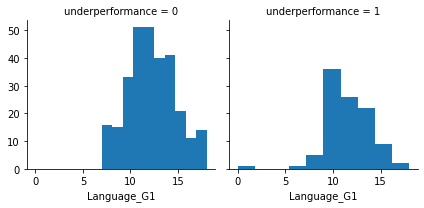

In [31]:
x = sns.FacetGrid(df, col = 'underperformance')
x = x.map(plt.hist, 'Language_G1')

<AxesSubplot:xlabel='age', ylabel='absences'>

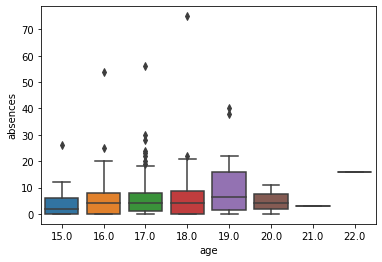

In [32]:
sns.boxplot(x='age', y = 'absences', data=df)

<AxesSubplot:xlabel='sex', ylabel='studytime'>

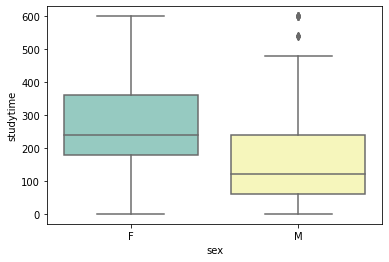

In [33]:
sns.boxplot(x="sex", y="studytime", data=df, palette="Set3")

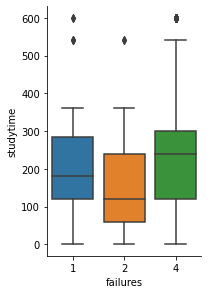

In [34]:
sns.catplot(x="failures", y="studytime", data=df, kind="box", height=4, aspect=.7);

After looking through our data, we can see that most columns do not have much correlation to the others. The only columns that have any sort of relationship is Math_G1 and Language_G1 where the correlation is only 31%. The rest of the colums all have a correlation less than 30%, which tells us that certain columns may lower our accuracy score.

### Setting up dummy variables to take care of categorial variables and normalizing the variables into numerical form.

In [35]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [36]:
def sex(x):
    if x == 'F':
        return 0
    elif x == 'M':
        return 1

df['sex'] = df['sex'].apply(sex)

In [37]:
df.sex.unique()

array([0, 1])

In [38]:
df.address.unique()

array(['U', 'R'], dtype=object)

In [39]:
def address(x):
    if x == 'U':
        return 0
    elif x == 'R':
        return 1

df['address'] = df['address'].apply(address)

In [40]:
df.address.unique()

array([0, 1])

In [41]:
df.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

In [42]:
def famsize(x):
    if x == 'GT3':
        return randint(4,6)
    elif x == 'LE3':
        return 3

df['famsize'] = df['famsize'].apply(famsize)

In [43]:
df.famsize.unique()

array([4, 3, 5, 6])

In [44]:
df.Pstatus.unique()

array(['A', 'T'], dtype=object)

In [45]:
def Pstatus(x):
    if x == 'A':
        return 0
    elif x == 'T':
        return 1

df['Pstatus'] = df['Pstatus'].apply(Pstatus)

In [46]:
df.Pstatus.unique()

array([0, 1])

In [47]:
df.Medu.unique()

array([4, 1, 3, 2, 0])

In [48]:
df.Fedu.unique()

array([4, 1, 2, 3, 0])

In [49]:
df.internet.unique()

array(['no', 'yes'], dtype=object)

In [50]:
def internet(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['internet'] = df['internet'].apply(internet)

In [51]:
df.internet.unique()

array([0, 1])

In [52]:
df.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [53]:
def Mjob(x):
    if x == 'at_home':
        return 0
    elif x == 'health':
        return 1
    elif x == 'other':
        return 2
    elif x == 'services':
        return 3    
    elif x == 'teacher':
        return 4
    
df['Mjob'] = df['Mjob'].apply(Mjob)

In [54]:
df.Mjob.unique()

array([0, 1, 2, 3, 4])

In [55]:
df.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [56]:
def Fjob(x):
    if x == 'at_home':
        return 0
    elif x == 'health':
        return 1
    elif x == 'other':
        return 2
    elif x == 'services':
        return 3    
    elif x == 'teacher':
        return 4
    
df['Fjob'] = df['Fjob'].apply(Fjob)

In [57]:
df.Fjob.unique()

array([4, 2, 3, 1, 0])

In [58]:
df.schoolsup.unique()

array(['yes', 'no'], dtype=object)

In [59]:
def schoolsup(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['schoolsup'] = df['schoolsup'].apply(schoolsup)

In [60]:
df.schoolsup.unique()

array([1, 0])

In [61]:
df.famsup.unique()

array(['no', 'yes'], dtype=object)

In [62]:
def famsup(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['famsup'] = df['famsup'].apply(famsup)

In [63]:
df.famsup.unique()

array([0, 1])

In [64]:
df.paid.unique()

array(['no', 'yes'], dtype=object)

In [65]:
def paid(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['paid'] = df['paid'].apply(paid)

In [66]:
df.paid.unique()

array([0, 1])

In [67]:
df.activities.unique()

array(['no', 'yes'], dtype=object)

In [68]:
def activities(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['activities'] = df['activities'].apply(activities)

In [69]:
df.activities.unique()

array([0, 1])

In [70]:
df.higher.unique()

array(['yes', 'no'], dtype=object)

In [71]:
def higher(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1

df['higher'] = df['higher'].apply(higher)

In [72]:
df.higher.unique()

array([1, 0])

In [73]:
df.Dalc.unique()

array([1, 2, 5, 3, 4])

In [74]:
df.Walc.unique()

array([1, 3, 2, 4, 5])

In [75]:
df = df.dropna()
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

This part of the data cleanup was normalizing the variables from strings to integers. In order to run our models with the best accuracy, all the data has to be converted to integer values that are similar in numbers. If it isn't normalized, it can have an effect on accuracy and our r-squared.

### Now let's begin testing our Logistic Regression Models. The first model will be with no Math_G1 and Language_G1 when determing underperformance because we don't know the grades in the first term.

In [76]:
#df2 = df.drop(columns = ['Math_G1','Language_G1'])
df2 = df
df2 = df2.drop(['Medu','Fedu','address'], axis = 1)
df2

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,famsize,Pstatus,Mjob,Fjob,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,24,120,4,6,5.0,0,0,4,0,0,4,1,0,0,0,1,0,4,3,1,1,3,1
1,17.0,4,180,4,4,5.0,9,0,4,1,0,2,0,1,0,0,1,1,5,3,1,1,3,1
2,15.0,13,180,4,10,7.0,12,0,3,1,0,2,1,0,1,0,1,1,4,3,2,3,3,0
3,15.0,7,480,4,2,15.0,14,0,5,1,1,3,0,1,1,1,1,1,3,2,1,1,5,0
4,16.0,11,300,4,4,6.0,11,0,5,1,2,2,0,1,1,0,1,0,4,3,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20.0,4,240,2,11,9.0,14,1,3,0,3,3,0,1,1,0,1,0,5,5,4,5,4,0
392,17.0,26,0,4,3,14.0,11,1,3,1,3,3,0,0,0,0,1,1,2,4,3,4,2,0
393,21.0,1,0,4,3,10.0,12,1,5,1,2,2,0,0,0,0,1,0,5,5,3,3,3,1
394,18.0,34,0,4,0,11.0,14,1,3,1,3,2,0,0,0,0,1,1,4,4,3,4,5,0


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop(['Math_G1','Language_G1','underperformance'],axis=1), 
                                                    df2['underperformance'], test_size=0.20, 
                                                    random_state=1)

In [78]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [79]:
Y_pred = model.predict(X_test)
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        61
           1       0.30      0.17      0.21        18

    accuracy                           0.72        79
   macro avg       0.54      0.53      0.52        79
weighted avg       0.67      0.72      0.69        79

0.7215189873417721


### 10-Fold Cross Validation for Accuracy Score and R-Squared

In [80]:
accuracy = []
for i in range(10):
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df2.drop(['Math_G1','Language_G1','underperformance'],axis=1), 
                                                    df2['underperformance'], test_size=0.20, random_state = randint(1,1000))
    model2 = LogisticRegression()
    model2.fit(X_train2, Y_train2)
    Y_pred2 = model2.predict(X_test2)
    accuracy.append(metrics.accuracy_score(Y_test2, Y_pred2))
    print('Trial {}, Accuracy: {}'.format(i,accuracy[i]))

rdf = pd.DataFrame({'Accuracy': accuracy})

Trial 0, Accuracy: 0.7848101265822784
Trial 1, Accuracy: 0.7721518987341772
Trial 2, Accuracy: 0.7341772151898734
Trial 3, Accuracy: 0.759493670886076
Trial 4, Accuracy: 0.6835443037974683
Trial 5, Accuracy: 0.7215189873417721
Trial 6, Accuracy: 0.7215189873417721
Trial 7, Accuracy: 0.7215189873417721
Trial 8, Accuracy: 0.7721518987341772
Trial 9, Accuracy: 0.7848101265822784


In [81]:
print(rdf['Accuracy'].mean())

0.7455696202531645


In [82]:
X = df2.drop(['Math_G1','Language_G1','underperformance'], axis=1).values.reshape((-1,21))
Y = df2['underperformance'].values.reshape((-1,1))

In [83]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,-0.521481
1,1,-0.489087
2,2,-0.274194
3,3,-0.274194
4,4,-0.049336
5,5,-0.223133
6,6,-0.455263
7,7,-0.436364
8,8,-0.178070
9,9,-0.226708


In [84]:
print(rdf['Rsquare'].mean())

-0.3127829756486325


### Now that we have tested our first Logisitic Regression Model without Math_G1 and Language_G1, let's test it just without Language_G1

In [85]:
df3 = df2
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop(['Language_G1','underperformance'],axis=1), 
                                                    df3['underperformance'], test_size=0.20, 
                                                    random_state=1)

In [86]:
model2 = LogisticRegression()
model2.fit(X_train,Y_train)

LogisticRegression()

In [87]:
Y_pred = model2.predict(X_test)
predictions = model2.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        61
           1       0.70      0.89      0.78        18

    accuracy                           0.89        79
   macro avg       0.83      0.89      0.85        79
weighted avg       0.90      0.89      0.89        79

0.8860759493670886


In [88]:
accuracy = []
for i in range(10):
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df3.drop(['Language_G1','underperformance'],axis=1), 
                                                    df3['underperformance'], test_size=0.20, random_state = randint(1,1000))
    model2 = LogisticRegression()
    model2.fit(X_train2, Y_train2)
    Y_pred2 = model2.predict(X_test2)
    accuracy.append(metrics.accuracy_score(Y_test2, Y_pred2))
    print('Trial {}, Accuracy: {}'.format(i,accuracy[i]))

rdf = pd.DataFrame({'Accuracy': accuracy})

Trial 0, Accuracy: 0.9493670886075949
Trial 1, Accuracy: 0.9493670886075949
Trial 2, Accuracy: 0.8481012658227848
Trial 3, Accuracy: 0.8227848101265823
Trial 4, Accuracy: 0.8860759493670886
Trial 5, Accuracy: 0.9240506329113924
Trial 6, Accuracy: 0.8987341772151899
Trial 7, Accuracy: 0.759493670886076
Trial 8, Accuracy: 0.9367088607594937
Trial 9, Accuracy: 0.8354430379746836


In [89]:
print(rdf['Accuracy'].mean())

0.8810126582278481


In [110]:
X = df3.drop(['Language_G1','underperformance'], axis=1).values.reshape((-1,22))
Y = df3['underperformance'].values.reshape((-1,1))

In [111]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = randint(1,1000))
    model2 = LogisticRegression()
    model2.fit(X_train, Y_train)
    Y_pred = model2.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.521212
1,1,0.400380
2,2,0.397458
3,3,0.307018
4,4,0.263559
5,5,0.280510
6,6,0.263559
7,7,0.598305
8,8,0.141304
9,9,0.254717


In [112]:
print(rdf['Rsquare'].mean())

0.3428021874818438


### Our last model now will now test with both Math_G1 and Language_G1 to test if there is any change in accuracy based on the previosu 2 Logistic Regression Models

In [93]:
df4 = df2
X_train, X_test, Y_train, Y_test = train_test_split(df4.drop(['underperformance'],axis=1), 
                                                    df4['underperformance'], test_size=0.20, 
                                                    random_state=1)

In [94]:
model3 = LogisticRegression()
model3.fit(X_train,Y_train)

LogisticRegression()

In [95]:
Y_pred = model3.predict(X_test)
predictions = model3.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.71      0.94      0.81        18

    accuracy                           0.90        79
   macro avg       0.85      0.91      0.87        79
weighted avg       0.92      0.90      0.90        79

0.8987341772151899


In [96]:
accuracy = []
for i in range(10):
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df3.drop(['Language_G1','underperformance'],axis=1), 
                                                    df3['underperformance'], test_size=0.20, random_state = randint(1,1000))
    model2 = LogisticRegression()
    model2.fit(X_train2, Y_train2)
    Y_pred2 = model2.predict(X_test2)
    accuracy.append(metrics.accuracy_score(Y_test2, Y_pred2))
    print('Trial {}, Accuracy: {}'.format(i,accuracy[i]))

rdf = pd.DataFrame({'Accuracy': accuracy})

Trial 0, Accuracy: 0.8607594936708861
Trial 1, Accuracy: 0.8860759493670886
Trial 2, Accuracy: 0.9240506329113924
Trial 3, Accuracy: 0.8481012658227848
Trial 4, Accuracy: 0.8481012658227848
Trial 5, Accuracy: 0.8481012658227848
Trial 6, Accuracy: 0.8734177215189873
Trial 7, Accuracy: 0.9240506329113924
Trial 8, Accuracy: 0.8860759493670886
Trial 9, Accuracy: 0.8481012658227848


In [97]:
print(rdf['Accuracy'].mean())

0.8746835443037975


In [104]:
X = df4.drop(['underperformance'], axis=1).values.reshape((-1,23))
Y = df4['underperformance'].values.reshape((-1,1))

In [105]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = randint(1,1000))
    model3 = LogisticRegression()
    model3.fit(X_train, Y_train)
    Y_pred = model3.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.059524
1,1,0.099123
2,2,0.373016
3,3,0.341667
4,4,0.475332
5,5,0.568306
6,6,0.281818
7,7,0.129661
8,8,0.341667
9,9,0.416256


In [106]:
print(rdf['Rsquare'].mean())

0.3086369258533519


### Analysis:
- After completing all 3 Logistic Regression Models, we can see that the most accurate one was the 2nd Logistic Regression model without Language_G1. What we can state from looking at all 3 models, is the fact that Language_G1 in our data, reduces our accuracy score and r-squared. 
   - Accuracy Score and R-Square were both the highest in model 2 at around 80% and 32% respectively.
   - Logistic Model 3 with both Math_G1 and Language_G1 both have a lower score in accuracy and r-squared at 86% and 26% respectively.
- The first model without Math_G1 compared to the other 2 with Math_G1 has a significantly lower accuracy and f1_score. We can also state that without Math_G1 in the model, predicting the underperformance will be very difficult.